In [1]:
import pandas as pd
import lale.datasets
(train_X, train_y), (test_X, test_y) = lale.datasets.california_housing_df()
pd.concat([train_X.head(), train_y.head()], axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


In [2]:
from sklearn.preprocessing import StandardScaler as Scale
from sklearn.preprocessing import Normalizer as Norm
from lale.lib.lale import NoOp
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor as Tree
from sklearn.linear_model import LinearRegression as Linear
from xgboost import XGBRegressor as XGB
lale.wrap_imported_operators()

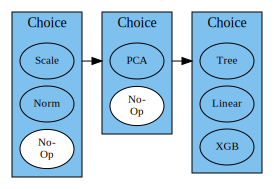

In [3]:
planned_pipeline = (Scale | Norm | NoOp) >> (PCA | NoOp) >> (Tree | Linear | XGB)
planned_pipeline.visualize()

In [4]:
from lale.lib.lale import Hyperopt
import sklearn.metrics
r2 = sklearn.metrics.make_scorer(sklearn.metrics.r2_score)
trained_pipeline = planned_pipeline.auto_configure(
    train_X, train_y, optimizer=Hyperopt, scoring=r2,
    max_opt_time=3*60, max_eval_time=30, cv=3)

 64%|████▍  | 32/50 [03:12<01:48,  6.00s/trial, best loss: -0.6110921251096774]


R2 score: 0.58


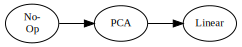

In [5]:
print(f'R2 score: {r2(trained_pipeline, test_X, test_y):.2f}')
trained_pipeline.visualize()

In [6]:
trained_pipeline.pretty_print(ipython_display=True)

```python
from lale.lib.lale import NoOp
from lale.lib.sklearn import PCA
from lale.lib.sklearn.linear_regression import Linear
import lale
lale.wrap_imported_operators()

pca = PCA(svd_solver='full')
linear = Linear(normalize=True)
pipeline = NoOp() >> pca >> linear
```